Chọn phương pháp xử lý:
F: Fast Fourier Transform
L: Butterworth Lowpass Filter
H: Butterworth Highpass Filter


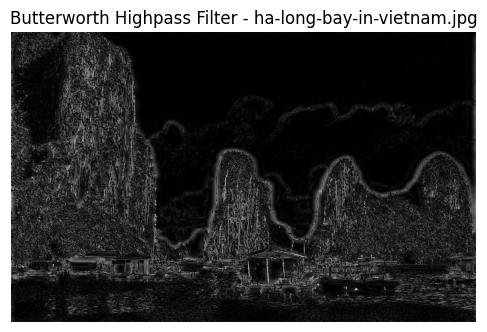

In [3]:
from PIL import Image
import math
import scipy
import imageio.v2 as iio
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def fast_fourier_transform(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    f = np.fft.fft2(gray)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)
    return magnitude_spectrum

def butterworth_lowpass_filter(image, d0=30, n=2):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rows, cols = gray.shape
    crow, ccol = rows // 2, cols // 2

    dft = np.fft.fft2(gray)
    dft_shift = np.fft.fftshift(dft)

    u = np.array(range(rows)) - crow
    v = np.array(range(cols)) - ccol
    V, U = np.meshgrid(v, u)
    D = np.sqrt(U**2 + V**2)
    H = 1 / (1 + (D / d0)**(2 * n))

    G = dft_shift * H
    img_back = np.fft.ifftshift(G)
    img_back = np.fft.ifft2(img_back)
    img_back = np.abs(img_back)
    return img_back

def butterworth_highpass_filter(image, d0=30, n=2):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rows, cols = gray.shape
    crow, ccol = rows // 2, cols // 2

    dft = np.fft.fft2(gray)
    dft_shift = np.fft.fftshift(dft)

    u = np.array(range(rows)) - crow
    v = np.array(range(cols)) - ccol
    V, U = np.meshgrid(v, u)
    D = np.sqrt(U**2 + V**2)
    H = 1 - 1 / (1 + (D / d0)**(2 * n))

    G = dft_shift * H
    img_back = np.fft.ifftshift(G)
    img_back = np.fft.ifft2(img_back)
    img_back = np.abs(img_back)
    return img_back

def process_image(method):
    input_folder = 'exercise'
    output_folder = 'output'
    os.makedirs(output_folder, exist_ok=True)

    filename = 'ha-long-bay-in-vietnam.jpg'  # Đổi đuôi file nếu cần

    img_path = os.path.join(input_folder, filename)
    if not os.path.exists(img_path):
        print('Ảnh không tồn tại trong thư mục exercise.')
        return

    image = cv2.imread(img_path)

    if method == 'F':
        result = fast_fourier_transform(image)
        method_name = 'Fourier Transform'
    elif method == 'L':
        result = butterworth_lowpass_filter(image)
        method_name = 'Butterworth Lowpass Filter'
    elif method == 'H':
        result = butterworth_highpass_filter(image)
        method_name = 'Butterworth Highpass Filter'
    else:
        print('Phím không hợp lệ.')
        return

    # Lưu ảnh
    save_path = os.path.join(output_folder, f"{method}_{filename}")
    cv2.imwrite(save_path, result)

    # Hiển thị ảnh
    plt.figure(figsize=(6, 6))
    plt.title(f'{method_name} - {filename}')
    plt.imshow(result, cmap='gray')
    plt.axis('off')
    plt.show()

# Yêu cầu người dùng chọn phương pháp
print("Chọn phương pháp xử lý:")
print("F: Fast Fourier Transform")
print("L: Butterworth Lowpass Filter")
print("H: Butterworth Highpass Filter")
method = input("Nhập lựa chọn (F/L/H): ").upper()

process_image(method)